In [32]:
import numpy as np
import scipy as sp
import cv2 as cv
import skimage as ski
import matplotlib.pyplot as plt

from graythresh import graythresh

In [6]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (24,12)

### 1.1 LoG

(601, 601)


(<AxesSubplot:title={'center':'sigma = 2'}>,
 Text(0.5, 1.0, 'sigma = 2'))

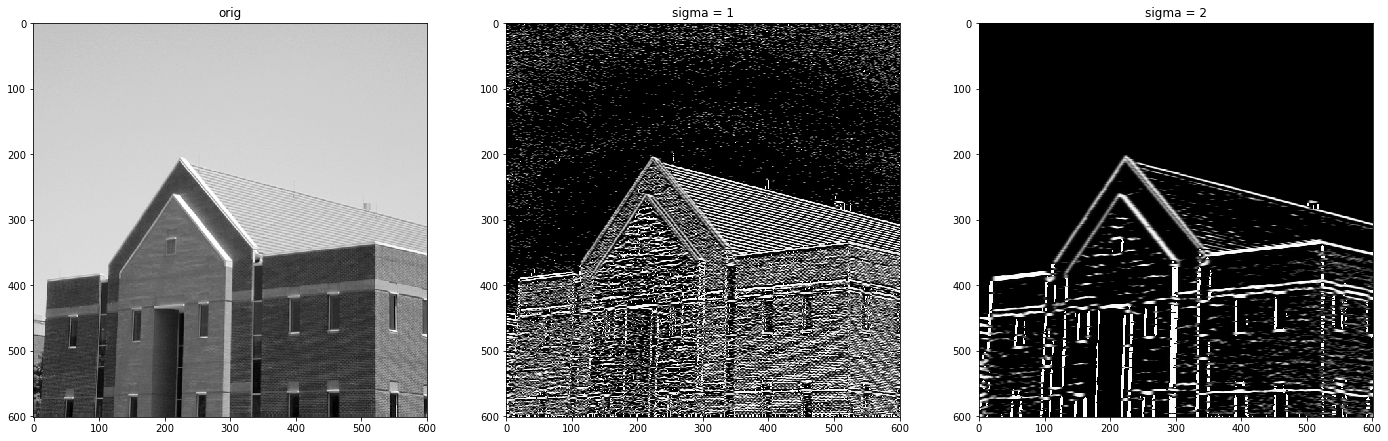

In [29]:
I = ski.io.imread('pic.3.tif')
print(I.shape)

plt.subplot(131), plt.imshow(I), plt.title('orig')
plt.subplot(132), plt.imshow(sp.ndimage.gaussian_laplace(I, 1)), plt.title('sigma = 1')
plt.subplot(133), plt.imshow(sp.ndimage.gaussian_laplace(I, 2)), plt.title('sigma = 2')

### 1.2. Canny

(601, 601)


(<AxesSubplot:title={'center':'canny, sigma = 2'}>,
 Text(0.5, 1.0, 'canny, sigma = 2'))

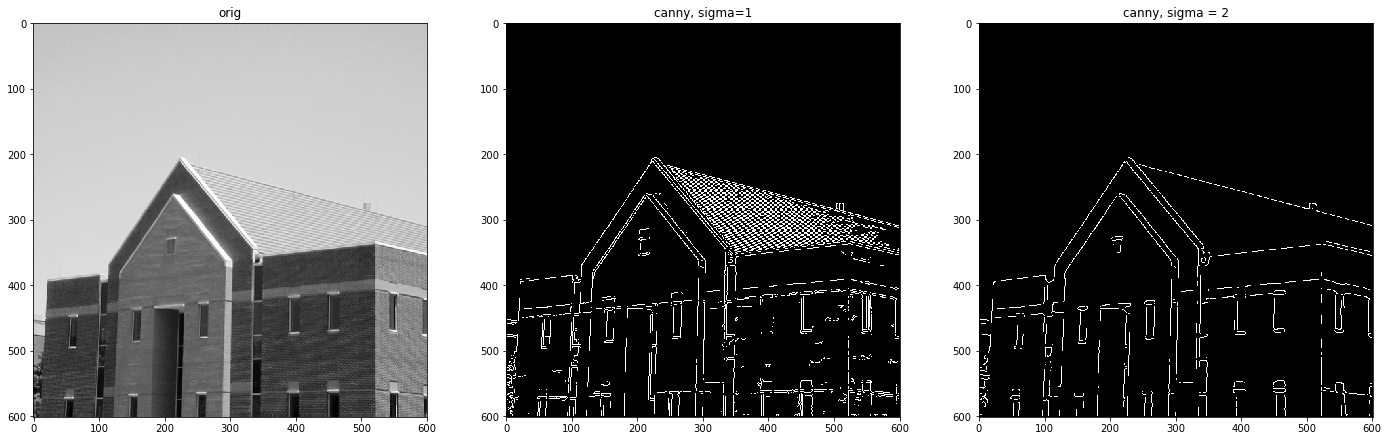

In [31]:
I = ski.io.imread('pic.3.tif')
print(I.shape)

plt.subplot(131), plt.imshow(I), plt.title('orig')
plt.subplot(132), plt.imshow(ski.feature.canny(I, 1)), plt.title('canny, sigma=1')
plt.subplot(133), plt.imshow(ski.feature.canny(I, 2)), plt.title('canny, sigma = 2')

### 2. Обробка з глобальним порогом

(918, 2018) 180
t =  101.0


(<AxesSubplot:title={'center':'graythresh'}>,
 Text(0.5, 1.0, 'graythresh'))

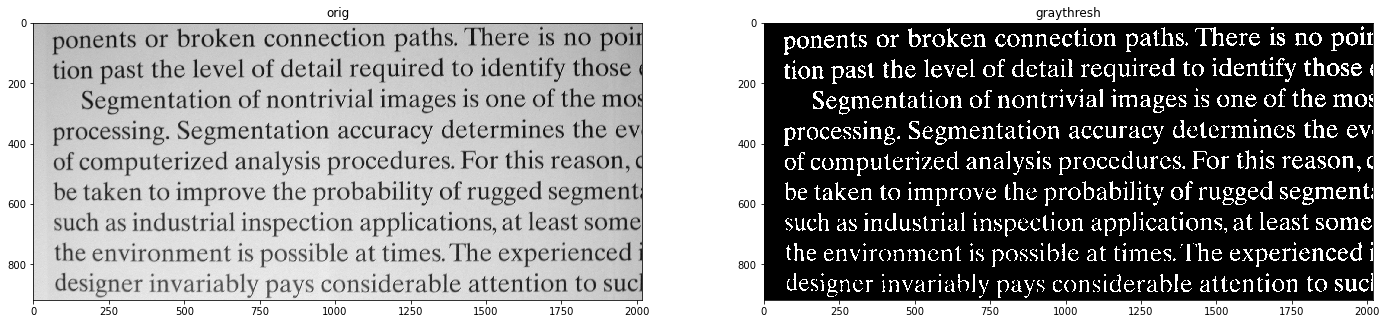

In [38]:
I = ski.io.imread('pic.4.tif')
print(I.shape, I.max())

t = graythresh(I) * 255
print('t = ', t)
res = I < t

plt.subplot(121), plt.imshow(I), plt.title('orig')
plt.subplot(122), plt.imshow(res), plt.title('graythresh')

### 3. Сегментація по вододілам за допомогою перетворення відстані

(531, 675) True


(<AxesSubplot:title={'center':'watershed'}>,
 Text(0.5, 1.0, 'watershed'))

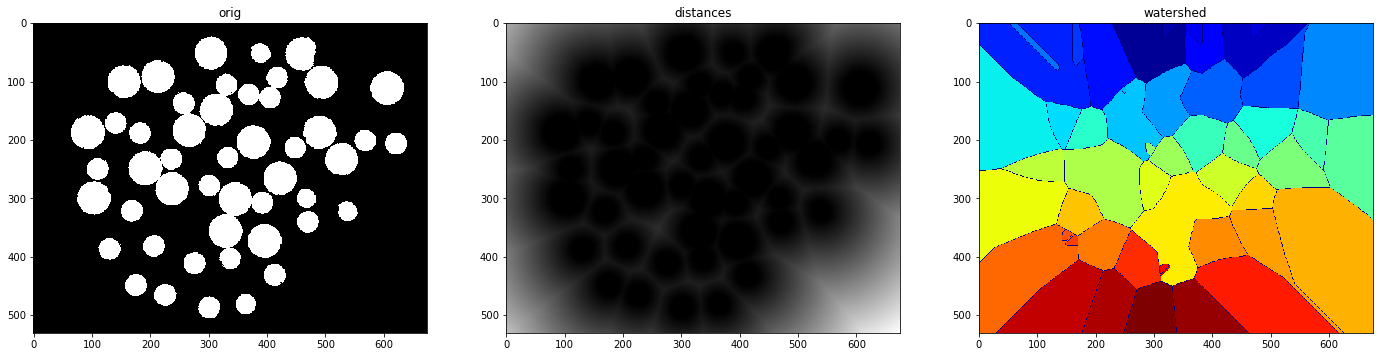

In [46]:
I = ski.io.imread('pic.5.tif')
print(I.shape, I.max())

ds = sp.ndimage.distance_transform_edt(1 - I)
ws = ski.segmentation.watershed(ds, watershed_line=True)

plt.subplot(131), plt.imshow(I), plt.title('orig')
plt.subplot(132), plt.imshow(ds), plt.title('distances')
plt.subplot(133), plt.imshow(ws, 'jet'), plt.title('watershed')

### 4. Сегментація по вододілам за допомогою градієнтів

(128, 128) 120


(<AxesSubplot:title={'center':'blurred sobel watershed'}>,
 Text(0.5, 1.0, 'blurred sobel watershed'))

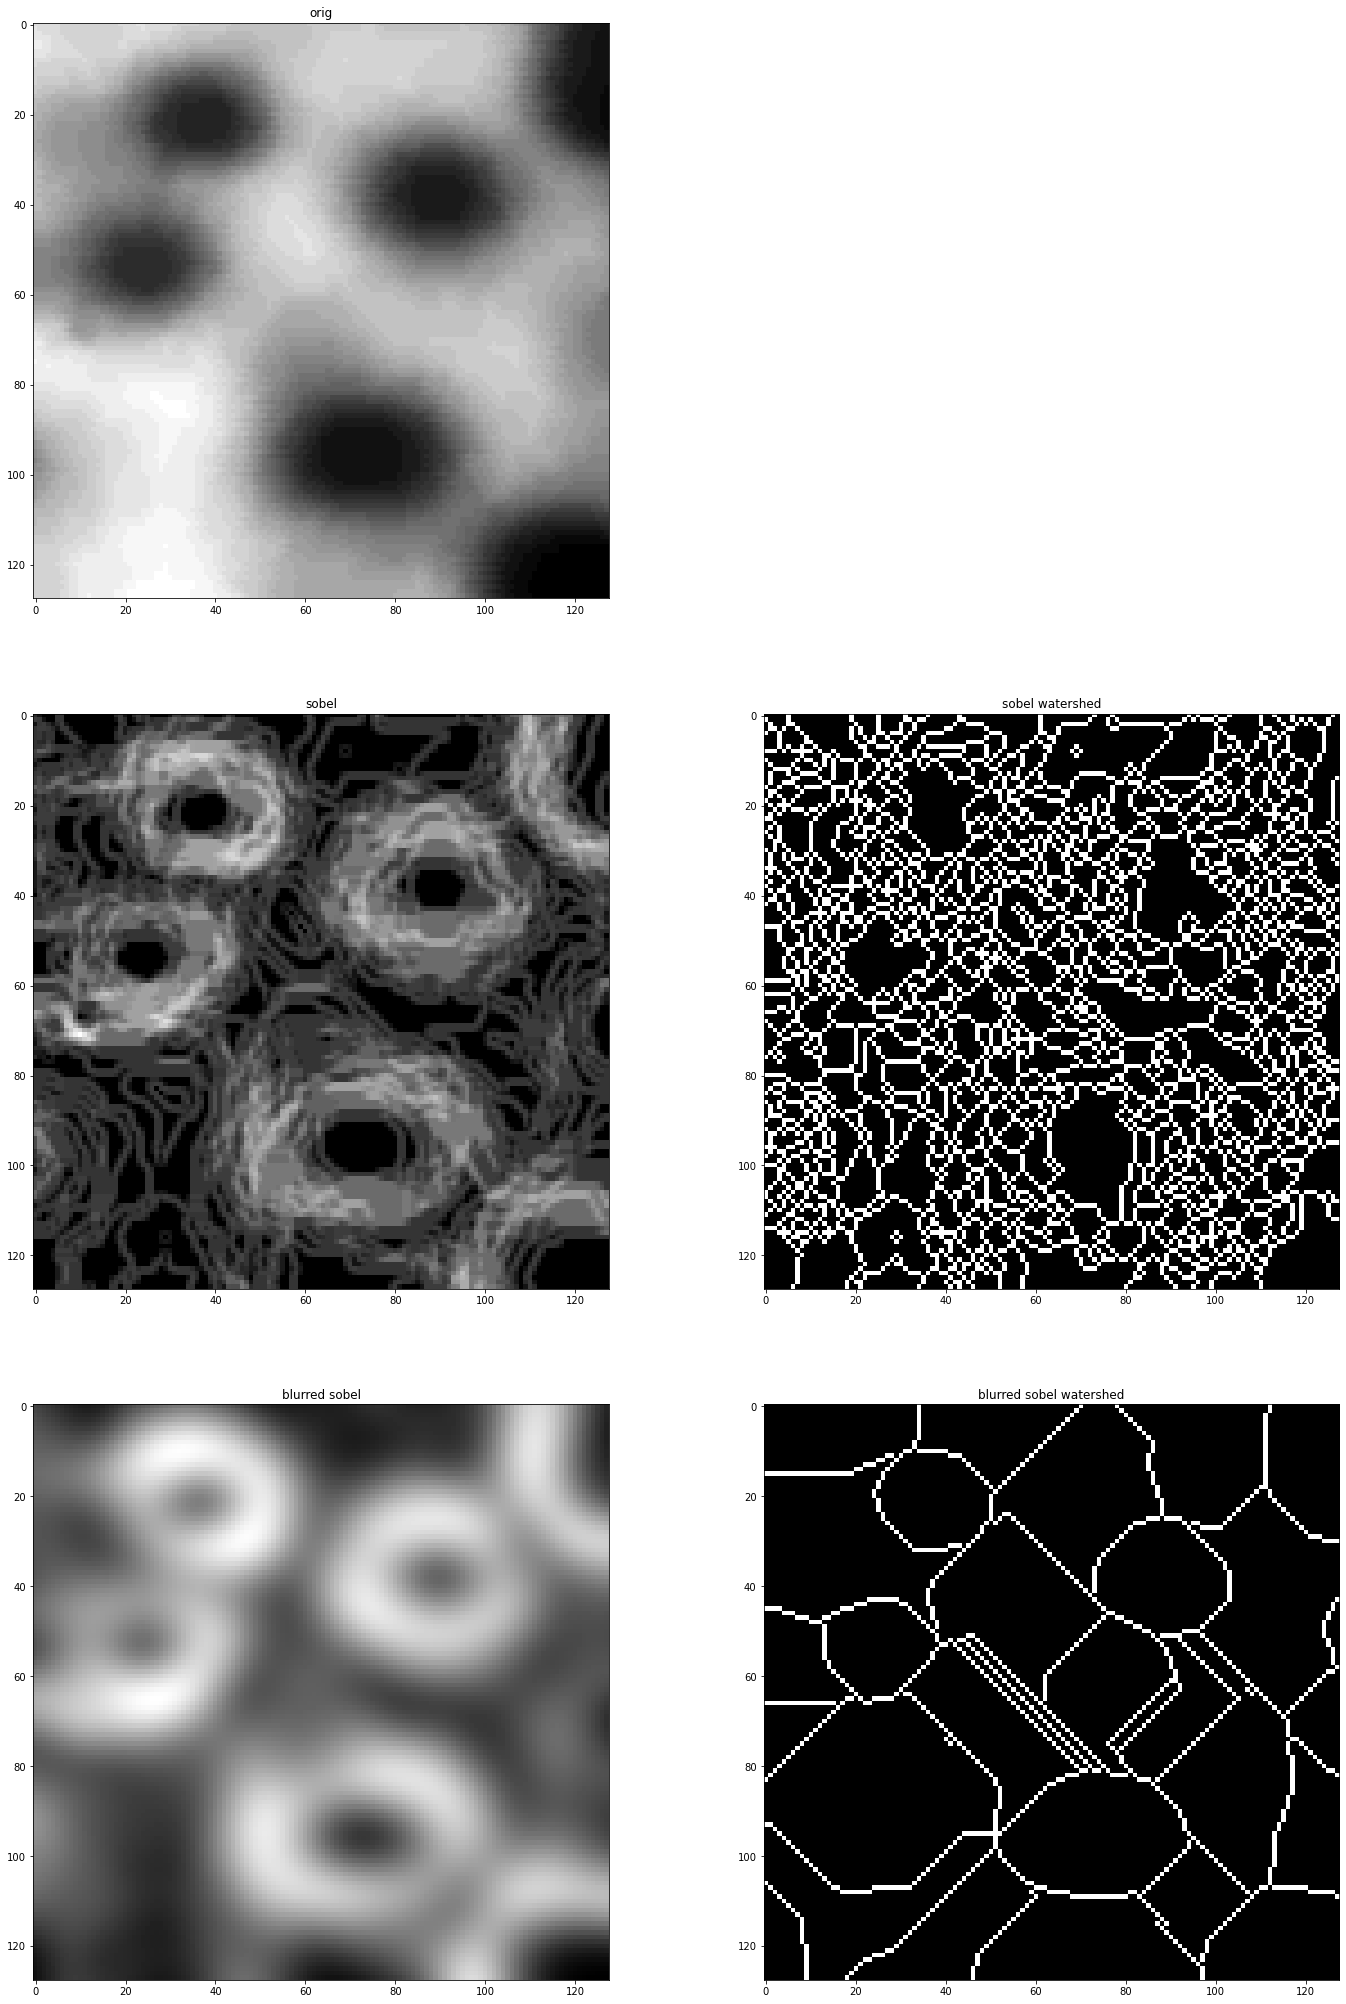

In [78]:
I = ski.io.imread('pic.6.tif')
print(I.shape, I.max())

ds = ski.filters.sobel(I)
ws = ski.segmentation.watershed(ds, watershed_line=True)
ws = 255*(ws == 0)

dsblur = ski.filters.gaussian(ds, 5)
wsblur = ski.segmentation.watershed(dsblur, watershed_line=True)
wsblur = 255*(wsblur == 0)

plt.gcf().set_size_inches((24,36))
plt.subplot(321), plt.imshow(I), plt.title('orig')
plt.subplot(323), plt.imshow(ds), plt.title('sobel')
plt.subplot(324), plt.imshow(ws), plt.title('sobel watershed')
plt.subplot(325), plt.imshow(dsblur), plt.title('blurred sobel')
plt.subplot(326), plt.imshow(wsblur), plt.title('blurred sobel watershed')

### 5. Виконати сегментацію кольорового зображення за допомогою кластеризації по k-середніх

Color quantization

(321, 481, 3)
255


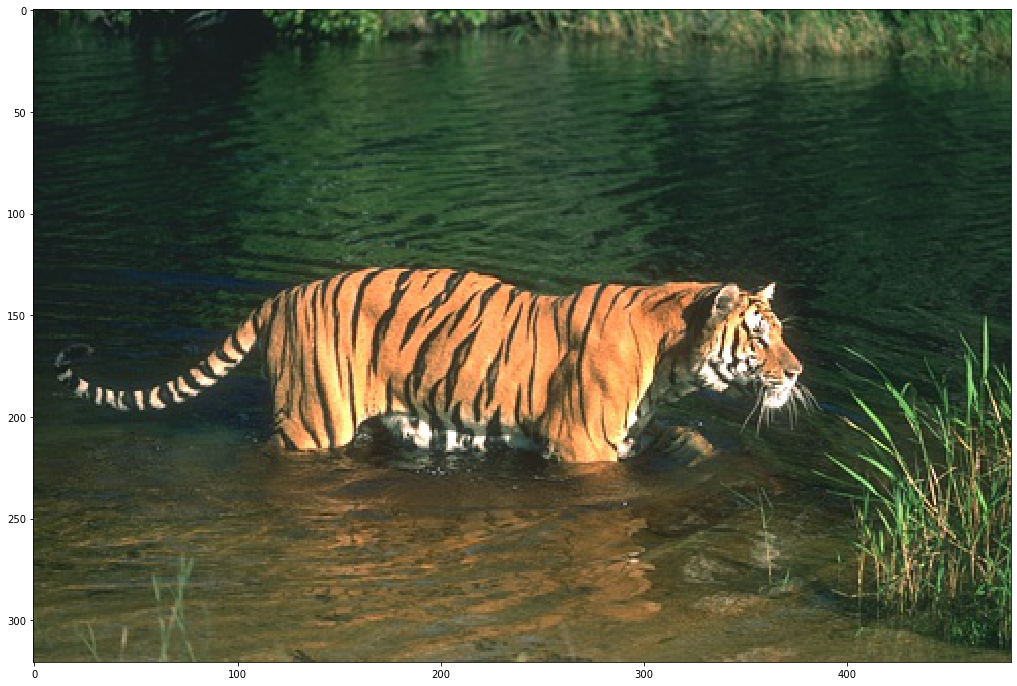

In [91]:
I = ski.io.imread('pic.8.jpg')
print(I.shape)

plt.imshow(I)

print(I[:,:,1].max())

criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:
type of termination criteria. It has 3 flags as below:
- cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
- cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
- cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
max_iter - An integer specifying maximum number of iterations.
epsilon - Required accuracy

labels (154401, 1)
centers
 [[ -3.5415533   11.347137  ]
 [  3.5440135   45.18237   ]
 [-20.748333    22.19887   ]
 [ 13.312521    31.355833  ]
 [ 24.405441    44.479538  ]
 [ -5.6841364    0.94573015]
 [-11.091888     5.8981996 ]
 [-15.869432    12.7366    ]
 [ -5.6234503   19.629248  ]
 [  2.4652977   23.780092  ]]
0.01594872927861301


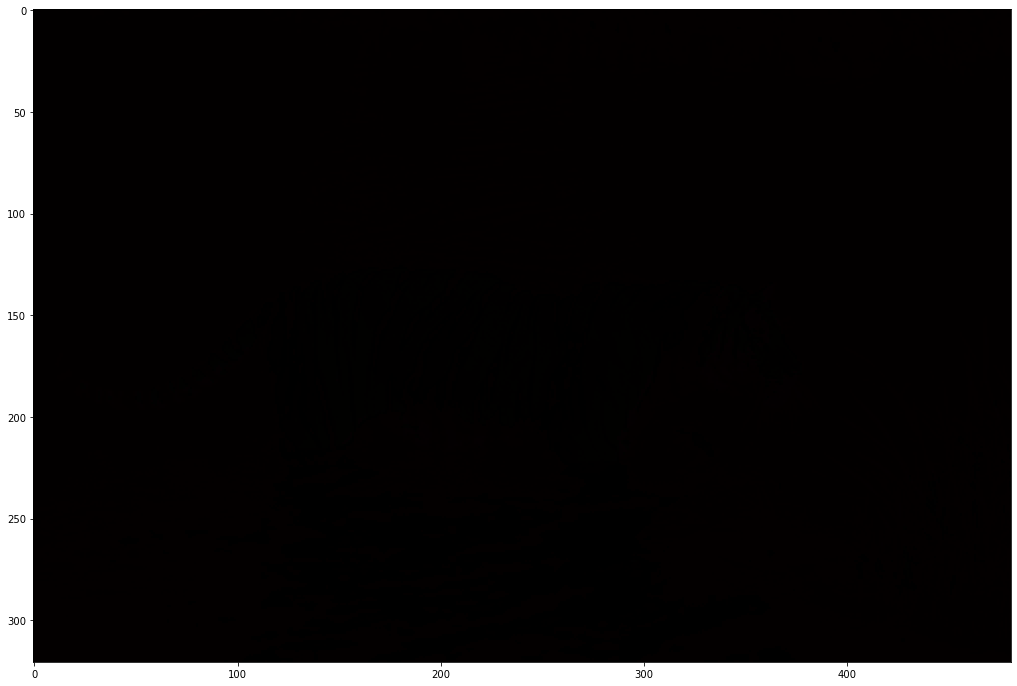

In [147]:
def color_quantize(img, K):
    I_lab = ski.color.rgb2lab(img)

    colors = I_lab[:, :, (1,2)]  # only a,b
    data = np.float32(colors.reshape(-1,2))

    crit = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.1)
    flags = cv.KMEANS_RANDOM_CENTERS

    ret, labels, centers = cv.kmeans(data, K, None, crit, 5, flags)

    # centers = np.uint8(centers)

    print('labels', labels.shape)
    print('centers\n', centers)

    new_colors = centers[labels.flatten()]
    new_colors = new_colors.reshape((colors.shape[0], colors.shape[1], 2))

    res = np.empty_like(img)
    res[:,:,0] = I_lab[:,:,0]
    res[:,:,1] = new_colors[:,:,0]
    res[:,:,2] = new_colors[:,:,1]

    rgb = ski.color.lab2rgb(res)

    print(rgb.max())

    return labels, np.clip(rgb, 0, 1)

labels, a = color_quantize(I, 10)

plt.imshow(a)


In [ ]:
cv.kmeans(L, )